In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
def obstacle_penalty(self, observation, penalty_factor):
    """
    Calculates the value of probability density function of a bivariate normal distribution at a given point.
    Arguments:
    x, y : float
        Coordinates of the point at which to calculate the probability density value.
    mu_x, mu_y : float
        Mean values (expectations) along the X and Y axes, respectively.
    sigma_x, sigma_y : float
        Standard deviations along the X and Y axes, respectively.
    rho : float
        Correlation coefficient between X and Y.

    Returns:
    float
        Value of the probability density function of a bivariate normal distribution at the given point (x, y).
    """
    mu_x = self.obstacle_x
    sigma_x = self.obstacle_sigma

    mu_y = self.obstacle_y
    sigma_y = self.obstacle_sigma
    rho = 0
    x = observation[0, 0]
    y = observation[0, 1]
    z = ((x - mu_x) ** 2) / (sigma_x ** 2) + ((y - mu_y) ** 2) / (sigma_y ** 2) - (2 * rho * (x - mu_x) * (y - mu_y)) / (sigma_x * sigma_y)
    denom = 2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho ** 2)
    return np.exp(-z / (2 * (1 - rho ** 2))) / denom * penalty_factor

In [3]:
linestyle_dict = {
     'loosely dotted': (0, (1, 10)),
     'dotted': (0, (1, 1)),
     'densely dotted': (0, (1, 1)),
     'long dash with offset': (5, (10, 3)),
     'loosely dashed': (0, (5, 10)),
     'dashed': (0, (5, 5)),
     'densely dashed': (0, (5, 1)),
     'loosely dashdotted': (0, (3, 10, 1, 10)),
     'dashdotted': (0, (3, 5, 1, 5)),
     'densely dashdotted': (0, (3, 1, 1, 1)),
     'dashdotdotted': (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1)),
     'solid': 'solid'
}
style = {
            1: "dotted", 
            5: "solid", 
            10: "dashed", 
            50: "dashdotted", 
            100: "loosely dashdotted"
        }

colors = {
            1: "tab:orange", 
            5: "tab:blue", 
            10: "tab:green", 
            50: "tab:red", 
            100: "tab:purple"
        }

In [16]:
data_dir = "regelum_data/outputs/2024-07-23/12-21-55/0/.callbacks/HistoricalDataCallback"
# data_dir = "regelum_data/outputs/2024-07-24/08-38-05/0/.callbacks/HistoricalDataCallback"

df_list = []
for root, dirs, files in os.walk(data_dir):
    for fn in files:
        if not fn.endswith(".h5"):
            continue

        file_path = os.path.join(root, fn)
        df = pd.read_hdf(file_path, key="data")
        df["file_name"] = fn
        df_list.append(df)

concat_df = pd.concat(df_list)
concat_df.head()

,time,running_objective,current_value,episode_id,iteration_id,velocity [m/s],angular velocity [rad/s],x [m],y [m],angle [rad],file_name
0,0.0,0,0.030638,1,19,-0.22,-2.84,-1.000000,-1.000000,3.141593,observations_actions_it_00019.h5
1,0.1,0,0.059400,1,19,-0.22,-2.84,-0.978295,-1.003103,2.857593,observations_actions_it_00019.h5
2,0.2,0,0.086537,1,19,-0.22,-2.84,-0.958328,-1.012164,2.573593,observations_actions_it_00019.h5
3,0.3,0,0.112269,1,19,0.22,-2.84,-0.941700,-1.026456,2.289593,observations_actions_it_00019.h5
4,0.4,0,0.136754,1,19,0.22,-2.84,-0.953657,-1.008077,2.005593,observations_actions_it_00019.h5


In [17]:
concat_df.head()
concat_df["iteration_id"].max()

97

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


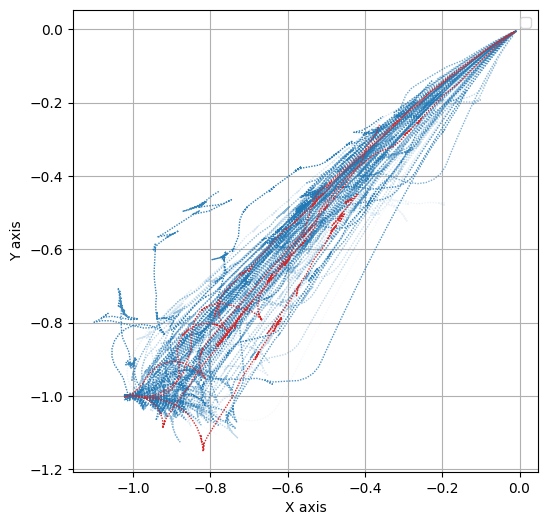

In [18]:
def plot_trajectories_given_trajectory(df):
    sub_df_1 = df
    trials = list(sub_df_1["file_name"].unique())
    trials.sort()

    fig, ax = plt.subplots(sharey=True, figsize=(6, 6))

    for param_trial in trials:
        sub_df_2 = sub_df_1[sub_df_1["file_name"] == param_trial]
        alpha = (sub_df_2["iteration_id"].max()/sub_df_1["iteration_id"].max())

        ax.plot(sub_df_2["x [m]"], sub_df_2["y [m]"], 
                linestyle=linestyle_dict[style[1]],
                lw=1, 
                color=colors[5] if sub_df_2["iteration_id"].max() <= sub_df_1["iteration_id"].max() - 5 else colors[50], 
                alpha=alpha)

    # draw goal pose
    ax.legend(bbox_to_anchor=(1, 1))

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    
    # Show the plot
    ax.grid(True)

plot_trajectories_given_trajectory(concat_df)

In [ ]:
def plot_objective(df):
    sub_df_1 = df
    trials = list(sub_df_1["file_name"].unique())
    trials.sort()

    fig, ax = plt.subplots(sharey=True, figsize=(6, 6))

    for param_trial in trials:
        sub_df_2 = sub_df_1[sub_df_1["file_name"] == param_trial]
        alpha = (sub_df_2["iteration_id"].max()/sub_df_1["iteration_id"].max())

        ax.plot(sub_df_2["time"], sub_df_2["y [m]"], 
                linestyle=linestyle_dict[style[1]],
                lw=1, 
                color=colors[5] if sub_df_2["iteration_id"].max() <= sub_df_1["iteration_id"].max() - 5 else colors[50], 
                alpha=alpha)

    # draw goal pose
    ax.legend(bbox_to_anchor=(1, 1))

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    
    # Show the plot
    ax.grid(True)

plot_objective(concat_df)